In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.shape

(500, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
#for categorizing the last column
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)

In [14]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [18]:
x=df.drop(['Chance of Admit '],axis=1)

In [20]:
y=df['Chance of Admit ']

In [22]:
y=y.astype(int)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [25]:
x_train.shape

(375, 8)

In [26]:
x_test.shape

(125, 8)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_pred=tree.predict(x_test)

In [35]:
result=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [36]:
result

,actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [37]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

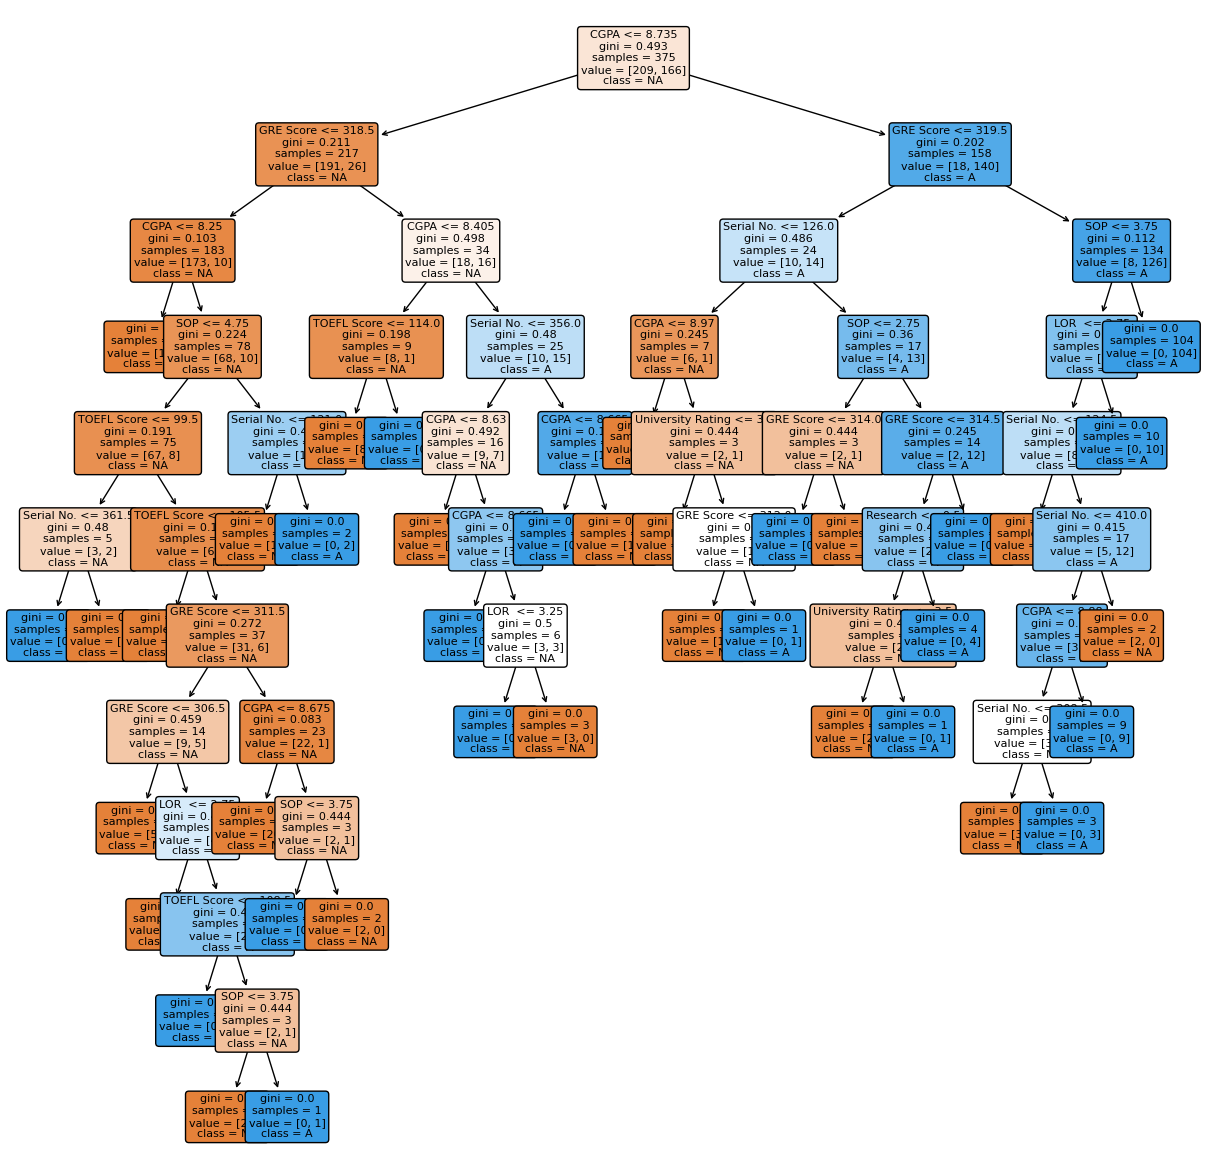

In [52]:
plt.figure(figsize=(15,15))
plot_tree(tree,fontsize=8,rounded=True,filled=True,feature_names=x.columns,class_names=['NA','A']);

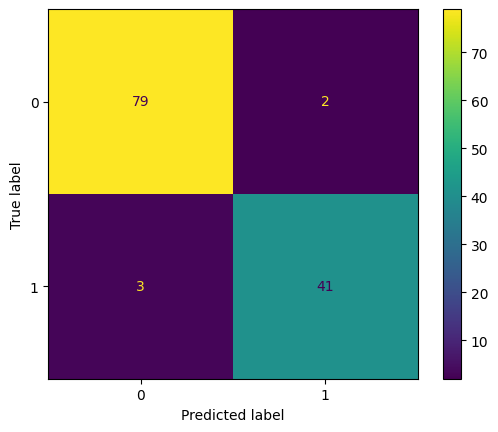

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_pred,y_test)

0.96